In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession.builder.master('local[*]').appName('covid')\
    .config("spark.driver.bindAddress", "127.0.0.1").getOrCreate()
spark

#  **Análise de Dados do novo Corona Vírus (2019-nCoV, covid-19)**

## Introdução
---

No presente trabalho, como parte da Conclusão de Curso de Ciência dos Dados na PUC-Minas Virtual, pretendemos avaliar a situação da pandemia do coronavírus 2019 no Brasil e no Mundo.

Nele coletamos dados, e informações, a respeito da doença. Esses dados foram obtidos de um repositório na plataforma [kaggle]() em que estão hospedados as informações que a Johns Hopkins estão disponibilizando.

Em cima desses dados faremos uma análise estatística descritiva desse dados e, por fim, uma regressão logística da curva a fim de predizer a evolução da doença no Brasil.

As análises serão feitas usando Python e bibliotecas que auxiliarão na análise como: Pyspark, pandas, numpy, matplotlib, boker, entre outras.

### Contextualização

Em 31 de Dezembro de 2019, a Organização Mundial de Saúde lançou um alerta sobre casos sérios de pneumonia na cidade Wuhan na China.
Esse casos teriam como causa raiz um novo vírus.

Esse novo vírus, um coronavírus da família do SARS e MERS, responsável pela disseminação das doenças respiratórias que tem levado diversas pessoas a óbito.
Inicialmente, a contaminação estava concentrada em Wuhan na província de Hubei na China.
E as pessoas contaminadas relatavam alguma relação com um [grande mercado de frutos do mar e animais](https://g1.globo.com/ciencia-e-saude/noticia/2020/02/07/pangolim-possivel-hospedeiro-intermediario-do-coronavirus-dizem-cientistas-chineses.ghtml?_ga=2.32560894.1115685470.1584910869-1095690670.1583698406).
O que sugere que se iniciou como uma contaminação passada de animais para pessoas.
Vírus similares são comumente encontrados em morcegos e pangolins, animais comercializados e consumidos no mercado mencionado.
Porém, a doença tem se espalhado além das fronteiras da China e se espalhado rapidamente pelo mundo, uma vez que o vírus passou a ser transmitido de pessoa para pessoa.

Dentre os sintomas os mais comuns da doença estão a tosse e febre acima de 37°C.
E os sintomas mais graves são Insuficiência renal e dificuldade respiratória aguda conforme [informativo do G1](https://especiais.g1.globo.com/bemestar/2020/coronavirus/?_ga=2.57728874.1115685470.1584910869-1095690670.1583698406).
A transmissão tem acontecido de diversas formas:

* Pelo ar:
  * Por saliva, catarro e gotículas expelidas pela boca (espirro, tosse e fala)

* Por contato:
  * Beijo
  * Aperto de mão
  * Abraço

* Superfícies não higienizadas:
  * Celulares
  * Maçanetas
  * Corrimão
  * Botões
  * Teclas
  * Apoios de transporte público

* Via animais:
  * Consumo de animais contaminados

Devido a transmissão entre pessoas ser feita através de práticas e comportamento comuns da pessoas medidas preventivas tem sido adotadas e recomendadas, como:

* Lavar as mãos até os pulsos, inclusive a parte interna das unhas
* Uso de álcool 70% antes de encostar em áreas como olhos, nariz ou boca
* Ao tossir cobrir a boca com máscara ou partes do corpo como interior do cotovelo
* Evitar multidões
* Evitar tocar olhos, nariz ou boca
* Limpar com álcool objetos tocados frequentemente
* Evitar cumprimentos como apertos de mão, abraços ou beijos
* Evitar sair de casa caso apresente algum sintoma de gripe
* Utilizar lenço descartável caso esteja com nariz escorrendo
* Evitar a divulgação de informações falsas e sem referência confiável


### Problema proposto

Com os dados da Johns Hopkins disponibilizados na plataforma do kaggle pretendemos fazer uma análise estatística
descritiva. Revendo a evolução da pandemia pelo mundo e, principalmente, no Brasil.

Com essa análise pretendemos dar uma visão sobre a evolução da doença no Brasil comparada aos demais países. E, por fim, fazer uma predição da
evolução do quadro nos próximos dias.


## Coleta de Dados
---
A Universidade de Johns Hopkins tem acompanhado o caso e disponibilado materias para a comunidade científica como um [*dashboard*](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) e dados em seu repositório no [github](https://github.com/CSSEGISandData).
Esses dados foram reformulados e disponibilizados na plataforma do [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) a fim de incentivar a comunidade de ciências dos dados a análisá-los e, eventualmente, levar a alguma descoberta a respeito dessa doença.

Usaremos esse dados ao longo do projeto a fim de analisar estatísticamente e corroborar as informações divulgadas.
Os dados são compostos de relatórios diários do quadro do coronavírus ao redor do mundo.


## Processamento e Tratamento de dados
---

Esses dados se iniciam em 22 de Janeiro de 2020 e vão até 26 de março de 2020.

In [10]:
folder_path = './novel-corona-virus-2019-dataset'
file_path = folder_path + '/covid_19_data.csv'
covid_19_data = spark.read.format("csv")\
    .option("header", "true")\
    .load(file_path).cache()
covid_19_data.sort('Last Update', ascending=False).show(5)
covid_19_data.sort('Last Update').show(5)

+----+---------------+--------------+-------------------+-----------+---------+------+---------+
| SNo|ObservationDate|Province/State|     Country/Region|Last Update|Confirmed|Deaths|Recovered|
+----+---------------+--------------+-------------------+-----------+---------+------+---------+
|7621|     03/22/2020|          null|            Andorra|3/8/20 5:31|    113.0|   1.0|      1.0|
|7626|     03/22/2020|          null|            Austria|3/8/20 5:31|   3580.0|  16.0|      9.0|
|7622|     03/22/2020|          null|             Angola|3/8/20 5:31|      2.0|   0.0|      0.0|
|7618|     03/22/2020|          null|        Afghanistan|3/8/20 5:31|     40.0|   1.0|      1.0|
|7623|     03/22/2020|          null|Antigua and Barbuda|3/8/20 5:31|      1.0|   0.0|      0.0|
+----+---------------+--------------+-------------------+-----------+---------+------+---------+
only showing top 5 rows

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|Ob

Esse conjunto de dados possui o seguinte esquema:

* *SNo* que seria o identificador do registro
* *ObservationDate* que seria a data em que o registro foi obtido
* *Province/State* é o estado ou província em que o registro foi obtido
* *Country/Region* é o país ou a região em que o registro foi obtido
* *Last Update* é a data da última atualização do registro
* *confirmed* é a quantidade de casos confirmados
* *deaths* é a quantidade de mortes registradas até a última atualização
* *recovered* é a quantidade de pacientes que se recuperaram

In [11]:
covid_19_data.printSchema()

root
 |-- SNo: string (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: string (nullable = true)
 |-- Deaths: string (nullable = true)
 |-- Recovered: string (nullable = true)



O identificador dos registros não será necessário em nossas análises e, por isso, podemos removê-lo dos nossos dados.
Além disso, os dados das quantidades de mortes, casos confirmados e recuperações estão em formato de texto e queremos como númericos.
Por fim, os dados referentes a *Mainland China* podemos tratar como da China inteira.

In [12]:
from pyspark.sql.types import IntegerType
covid_19_data = covid_19_data\
    .drop('SNo')
    #.withColumn('sno', covid_19_data['SNo'].cast(IntegerType()))
covid_19_data = covid_19_data\
    .withColumn('confirmed', covid_19_data['confirmed'].cast(IntegerType()))
covid_19_data = covid_19_data\
    .withColumn('deaths', covid_19_data['deaths'].cast(IntegerType()))
covid_19_data = covid_19_data\
    .withColumn('recovered', covid_19_data['recovered'].cast(IntegerType()))
covid_19_data = covid_19_data\
    .replace({'Mainland China':'China'})
covid_19_data.show()

+---------------+--------------+--------------+---------------+---------+------+---------+
|ObservationDate|Province/State|Country/Region|    Last Update|confirmed|deaths|recovered|
+---------------+--------------+--------------+---------------+---------+------+---------+
|     01/22/2020|         Anhui|         China|1/22/2020 17:00|        1|     0|        0|
|     01/22/2020|       Beijing|         China|1/22/2020 17:00|       14|     0|        0|
|     01/22/2020|     Chongqing|         China|1/22/2020 17:00|        6|     0|        0|
|     01/22/2020|        Fujian|         China|1/22/2020 17:00|        1|     0|        0|
|     01/22/2020|         Gansu|         China|1/22/2020 17:00|        0|     0|        0|
|     01/22/2020|     Guangdong|         China|1/22/2020 17:00|       26|     0|        0|
|     01/22/2020|       Guangxi|         China|1/22/2020 17:00|        2|     0|        0|
|     01/22/2020|       Guizhou|         China|1/22/2020 17:00|        1|     0|        0|

Além dos dados sobre os relatórios de corona vírus, iremos usar dados do Banco Mundial com o total da população dos países disponibilizado no [site do worldbank](https://data.worldbank.org/indicator/sp.pop.totl).
Esse conjunto de dados contêm o total da população de cada país por vários anos, desde 1960 até 2018.
Apesar de ter a coluna relacionado a 2019, os dados referentes a ela ainda não estão disponíveis e, por isso, iremos usar a população de 2018.
Essa informação nos ajudará a calcular a taxa de infecção do corono vírus por país (quanto casos confirmados dividido pelo tamanho da população).
Isso nos ajudará a contrastar o quão eficiente tem sido o combate a disseminação do vírus por país.

In [13]:
world_population_folder_path = './data-worldbank-pop-totl'
world_population_file_path = world_population_folder_path + '/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv'
world_population_data = spark.read.format("csv")\
    .option("header", "true")\
    .load(world_population_file_path)\
    .cache()

world_population_data = world_population_data.select(['Country Name', '2018'])

world_population_data.show()

+--------------------+---------+
|        Country Name|     2018|
+--------------------+---------+
|               Aruba|   105845|
|         Afghanistan| 37172386|
|              Angola| 30809762|
|             Albania|  2866376|
|             Andorra|    77006|
|          Arab World|419790588|
|United Arab Emirates|  9630959|
|           Argentina| 44494502|
|             Armenia|  2951776|
|      American Samoa|    55465|
| Antigua and Barbuda|    96286|
|           Australia| 24992369|
|             Austria|  8847037|
|          Azerbaijan|  9942334|
|             Burundi| 11175378|
|             Belgium| 11422068|
|               Benin| 11485048|
|        Burkina Faso| 19751535|
|          Bangladesh|161356039|
|            Bulgaria|  7024216|
+--------------------+---------+
only showing top 20 rows



## Análise e Exploração dos Dados

#### Países e regiões afetadas pelo Coronavírus (2019-nCoV) até agora
---

Após se espalhar para outros países além da China, a doença rapidamente se espalhou pelo mundo e já tem afetado quase todos os países no globo.

In [14]:
countries = covid_19_data.select('Country/Region')\
    .rdd.map(lambda r: r['Country/Region'])\
    .distinct()\
    .collect()
print("\n".join(countries))

print("\nTotal de países e regiões afetadas: ",len(countries))


China
Hong Kong
Macau
Taiwan
US
Japan
Thailand
South Korea
Singapore
Philippines
Malaysia
Vietnam
Australia
Mexico
Brazil
Colombia
France
Nepal
Canada
Cambodia
Sri Lanka
Ivory Coast
Germany
Finland
United Arab Emirates
India
Italy
UK
Russia
Sweden
Spain
Belgium
Others
Egypt
Iran
Israel
Lebanon
Iraq
Oman
Afghanistan
Bahrain
Kuwait
Austria
Algeria
Croatia
Switzerland
Pakistan
Georgia
Greece
North Macedonia
Norway
Romania
Denmark
Estonia
Netherlands
San Marino
 Azerbaijan
Belarus
Iceland
Lithuania
New Zealand
Nigeria
North Ireland
Ireland
Luxembourg
Monaco
Qatar
Ecuador
Azerbaijan
Czech Republic
Armenia
Dominican Republic
Indonesia
Portugal
Andorra
Latvia
Morocco
Saudi Arabia
Senegal
Argentina
Chile
Jordan
Ukraine
Saint Barthelemy
Hungary
Faroe Islands
Gibraltar
Liechtenstein
Poland
Tunisia
Palestine
Bosnia and Herzegovina
Slovenia
South Africa
Bhutan
Cameroon
Costa Rica
Peru
Serbia
Slovakia
Togo
Vatican City
French Guiana
Malta
Martinique
Republic of Ireland
Bulgaria
Maldives
Bangladesh


#### Estado atual mundialmente
---

A situação atual mundialmente pode ser percebida pelos registros mais recentes.


In [15]:
#Obtendo a data mais recente do conjunto de dados
from datetime import date, datetime
from pyspark.sql.functions import udf,  to_timestamp
from pyspark.sql.types import DateType, TimestampType

func =  udf (lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'), TimestampType())

covid_19_data=covid_19_data.withColumn('last_update', to_timestamp('Last Update'))
last_date = covid_19_data\
    .select('last_update')\
    .dropna().distinct()\
    .sort('last_update',ascending=False)\
    .head().last_update.date()

time_zero = datetime.min.time()
recent_datetime = datetime.combine(last_date, time_zero)


#filtrando pelos registros mais recentes
data_latest = covid_19_data.where(covid_19_data['last_update'] > recent_datetime)
data_latest.head()

Row(ObservationDate='03/28/2020', Province/State=None, Country/Region='Afghanistan', Last Update='2020-03-28 23:11:06', confirmed=110, deaths=4, recovered=2, last_update=datetime.datetime(2020, 3, 28, 23, 11, 6))

Uma métrica que podemos usar, para verificar o quão mortal é o vírus, é a taxa de mortalidade.
Essa taxa é calculada tomando como base a quantidade de mortes e a quantidade de casos confirmados.
E ela representa a proporção dos casos com morte em relação ao total de casos.

In [16]:
data_latest = data_latest.withColumn('fatalities_rate',data_latest['deaths']/data_latest['confirmed'])
data_latest = data_latest.withColumn('fatalities_rate_percent',(data_latest['deaths']*100)/data_latest['confirmed'])
data_latest = data_latest.withColumn('recovery_rate',data_latest['recovered']/data_latest['confirmed'])
data_latest = data_latest.withColumn('recovery_rate_percent',(data_latest['recovered']*100)/data_latest['confirmed'])

Recentemente o número de países que tem atualizado sua situação pode ser percebida nos registros feitos na última data.

In [17]:
#Criando um dataframe com a quantidade total de casos confirmados para cada país ou região
countries = data_latest.select(['Country/Region']).distinct().count()
print(countries)

179


Uma vez que possuímos os dados mais recentes podemos agrupar os registros por país.
Como cada país pode fazer mais de um registro por dia, iremos pegar apenas os valore máximos para cada quantidade.

In [18]:
worldwide_cases = data_latest.groupBy('Country/Region')\
                                        .agg({'deaths':'sum',
                                              'confirmed':'sum',
                                              'recovered':'sum'})\
                                    .withColumnRenamed('sum(confirmed)','confirmed')\
                                    .withColumnRenamed('sum(deaths)','deaths')\
                                    .withColumnRenamed('sum(recovered)','recovered')


worldwide_cases = worldwide_cases.withColumn('fatalities_rate',worldwide_cases['deaths']/worldwide_cases['confirmed'])\
                                 .withColumn('fatalities_rate_percent',(worldwide_cases['deaths']*100)/worldwide_cases['confirmed'])\
                                 .withColumn('recovery_rate',worldwide_cases['recovered']/worldwide_cases['confirmed'])\
                                 .withColumn('recovery_rate_percent',(worldwide_cases['recovered']*100)/worldwide_cases['confirmed'])



worldwide_cases = worldwide_cases.join(world_population_data, worldwide_cases['Country/Region'] == world_population_data['Country Name'],how='left')

worldwide_cases = worldwide_cases.withColumn('population_infection_rate', 100*worldwide_cases['confirmed']/worldwide_cases['2018'])



Assim temos, ao somar as quantidades uma visão geral dos diferentes casos - confirmados, mortes, recuperados e a taxa média de mortalidade.
O número de casos vem crescendo constantemente e recuperados também.
A taxa de mortalidade média está em torno de 5%, o que classifica como uma doença não tão letal quando comparada a outras doenças,
ver [lista de CFR no wikipedia](https://en.wikipedia.org/wiki/List_of_human_disease_case_fatality_rates).
Nessa lista outras doenças que tiveram surto recente no Brasil são mais letais.
Entretanto, vale ressaltar que a taxa de mortalidade do covid-19 tem se mostrado diferente conforme a política de tratamento da doença no país.
Variando de 0.5% a 10% dependendo do país e sua estratégia no combate ao covid-19 como veremos a seguir.

In [19]:
worldwide_total = worldwide_cases.groupBy().agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum',
})    .withColumnRenamed('sum(confirmed)','confirmed')\
    .withColumnRenamed('sum(deaths)','deaths')\
    .withColumnRenamed('sum(recovered)','recovered')\


worldwide_total = worldwide_total.withColumn('fatalities_rate_percent',(worldwide_total['deaths']*100)/worldwide_total['confirmed'])\
.withColumn('recovery_rate_percent',(worldwide_total['recovered']*100)/worldwide_total['confirmed'])


worldwide_total.select(['confirmed', 'deaths', 'recovered', 'fatalities_rate_percent', 'recovery_rate_percent']).show()

+---------+------+---------+-----------------------+---------------------+
|confirmed|deaths|recovered|fatalities_rate_percent|recovery_rate_percent|
+---------+------+---------+-----------------------+---------------------+
|   660706| 30652|   139415|      4.639279800698041|   21.100913265506897|
+---------+------+---------+-----------------------+---------------------+



Os vintes países mais atingidos estão listados abaixo. E já notamos que o Brasil está incluso.

In [20]:
worldwide_cases = worldwide_cases.sort('confirmed', ascending=False)

worldwide_cases.show()

+--------------+---------+---------+------+--------------------+-----------------------+--------------------+---------------------+------------+----------+-------------------------+
|Country/Region|recovered|confirmed|deaths|     fatalities_rate|fatalities_rate_percent|       recovery_rate|recovery_rate_percent|Country Name|      2018|population_infection_rate|
+--------------+---------+---------+------+--------------------+-----------------------+--------------------+---------------------+------------+----------+-------------------------+
|            US|     1072|   121478|  2026|0.016677916989084444|     1.6677916989084443|0.008824643145260871|    0.882464314526087|          US| 327167434|     0.037130223664009296|
|         Italy|    12384|    92472| 10023| 0.10838956657150273|     10.838956657150273| 0.13392161951725928|   13.392161951725928|       Italy|  60431283|       0.1530200839853094|
|         China|    74978|    81401|  3295| 0.04047861819879363|      4.047861819879363|  

#### Regiões e países mais afetados pela doença

---

##### Regiões e países com o maior número de casos confirmados

In [21]:
data_latest.groupBy(['Country/Region'])\
                .agg({'confirmed':'sum'})\
                .sort('sum(confirmed)', ascending=False).show(5)


+--------------+--------------+
|Country/Region|sum(confirmed)|
+--------------+--------------+
|            US|        121478|
|         Italy|         92472|
|         China|         81401|
|         Spain|         73235|
|       Germany|         57695|
+--------------+--------------+
only showing top 5 rows



##### Regiões e países com o maior número de mortos

In [22]:
data_latest.groupBy(['Country/Region'])\
                .agg({'deaths':'sum'})\
                .sort('sum(deaths)', ascending=False).show(5)


+--------------+-----------+
|Country/Region|sum(deaths)|
+--------------+-----------+
|         Italy|      10023|
|         Spain|       5982|
|         China|       3295|
|          Iran|       2517|
|        France|       2317|
+--------------+-----------+
only showing top 5 rows



##### Regiões e países com o maior número de recuperados

In [23]:
data_latest.groupby('Country/Region')\
    .agg({'recovered':'sum'})\
    .sort('sum(recovered)',ascending=False).show(5)


+--------------+--------------+
|Country/Region|sum(recovered)|
+--------------+--------------+
|         China|         74978|
|         Italy|         12384|
|         Spain|         12285|
|          Iran|         11679|
|       Germany|          8481|
+--------------+--------------+
only showing top 5 rows



Enquanto isso no Brasil, como vimos, já estamos com o quadro bastante avançado. 

In [24]:
worldwide_cases.where(worldwide_cases['Country/Region'] == 'Brazil').show()

+--------------+---------+---------+------+--------------------+-----------------------+--------------------+---------------------+------------+---------+-------------------------+
|Country/Region|recovered|confirmed|deaths|     fatalities_rate|fatalities_rate_percent|       recovery_rate|recovery_rate_percent|Country Name|     2018|population_infection_rate|
+--------------+---------+---------+------+--------------------+-----------------------+--------------------+---------------------+------------+---------+-------------------------+
|        Brazil|        6|     3904|   111|0.028432377049180328|     2.8432377049180326|0.001536885245901...|  0.15368852459016394|      Brazil|209469333|     0.001863757307137...|
+--------------+---------+---------+------+--------------------+-----------------------+--------------------+---------------------+------------+---------+-------------------------+



### Análise da evolução diária do quadro da doença por países
---

In [25]:
data_by_days = covid_19_data.withColumn('last_update', covid_19_data['last_update'].cast(DateType()))
data_by_days = data_by_days.groupby(['Country/Region', 'last_update'])\
    .sum().sort('last_update')\
    .withColumnRenamed('sum(confirmed)','confirmed')\
    .withColumnRenamed('sum(deaths)','deaths')\
    .withColumnRenamed('sum(recovered)','recovered')

Nessa análise iremos exibir um quadro com os últimos 15 dias e gráfico de barras expondo a evolução dos casos.

In [26]:

def plot_country_data(data, country_name):
    data_country = data.where(data['Country/Region']==country_name)

    data_country = data_country\
        .select(['last_update', 'confirmed', 'deaths', 'recovered'])\
        .filter(data_country.last_update.isNotNull())

    country_pd = data_country.toPandas().set_index('last_update')
    country_pd[['diff_confirmed', 'diff_deaths', 'diff_recovered']] = country_pd.diff()
    country_pd['fatalities_rate'] = country_pd['deaths']/country_pd['confirmed']
    country_pd['fatalities_rate_percent'] = (country_pd['deaths']*100)/country_pd['confirmed']
    country_pd['recovery_rate'] = country_pd['recovered']/country_pd['confirmed']
    country_pd['recovery_rate_percent'] = (country_pd['recovered']*100)/country_pd['confirmed']

    print(country_pd)

    country_pd[['confirmed', 'deaths', 'recovered']].plot.bar()

A China foi o ponto de origem da doença, principalmente, em torno de Wuhan em Hubei, aonde se encontra o mercado de frutos do mar e animais silvestres.
Com o surto massivo desde Dezembro de 2019 e o alerta da Organização Mundial de Saúde, o governo chinês anunciou um estado de quarentena a toda a população.
Esse estado de quarentena ditava além de que as pessoas não saiam de casa, o cancelamento de eventos, interrupção de atividades escolares, restrições de viagens, controle do acesso a transporte público e toque de recolher.
Isso tem levado a um controle da doença, levando a China a ter vários dias seguidos sem ter nenhum novo caso confirmado da doença [artigo sobre covid19 no wikipedia em inglês](https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic).

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-01          10       0          0             NaN          NaN   
2020-02-02       16606     361        463         16596.0        361.0   
2020-02-03       19692     425        614          3086.0         64.0   
2020-02-04       23713     490        844          4021.0         65.0   
2020-02-05       27436     562       1120          3723.0         72.0   
2020-02-06       30562     632       1482          3126.0         70.0   
2020-02-07       34056     717       1995          3494.0         85.0   
2020-02-08       36759     804       2592          2703.0         87.0   
2020-02-09       39890     904       3240          3131.0        100.0   
2020-02-10       42226    1011       3894          2336.0        107.0   
2020-02-11       44268    1111       4630          2042.0        100.0   
2020-02-12       44726    1116       5

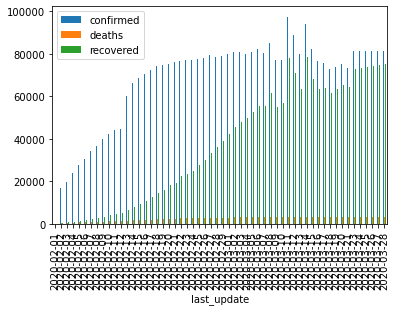

In [27]:
plot_country_data(data_by_days, "China")

A Itália recentemente superou a China na quantidade de casos confirmados assim como a quantidade de mortes, conforme vemos nessa [notícia no G1](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/19/numero-de-mortos-na-italia-por-covid-19-ultrapassa-total-de-vitimas-na-china.ghtml).
O caso na Itália infelizmente atingiu níveis alarmentes, uma vez que o volume supera a capacidade do sistema de saúde no país.
Devido a isso práticas polêmicas tem sido adotadas como a decisão de Sofia, em que os médicos podem decidir por não atender algum caso se perceberem que este possa não se recuperar, conforme a [notícia no portal da Terra](https://www.terra.com.br/noticias/mundo/coronavirus-medicos-podem-ter-de-fazer-escolha-de-sofia-por-quem-vai-viver-na-italia,6c45f42b7176055464c273a25d3caa615top54fk.html).

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-01-31          10       0          0             NaN          NaN   
2020-02-07          42       0          0            32.0          0.0   
2020-02-21          20       1          0           -22.0          1.0   
2020-02-22          62       2          1            42.0          1.0   
2020-02-23         155       3          2            93.0          1.0   
2020-02-24         229       7          1            74.0          4.0   
2020-02-25         322      10          1            93.0          3.0   
2020-02-26         453      12          3           131.0          2.0   
2020-02-27         655      17         45           202.0          5.0   
2020-02-28         888      21         46           233.0          4.0   
2020-02-29        1128      29         46           240.0          8.0   
2020-03-01        1694      34        

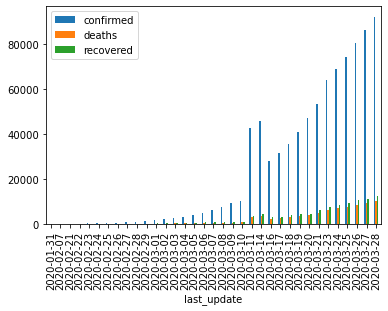

In [28]:
plot_country_data(data_by_days, "Italy")

O Irã determinou quarentena obrigando o fechamento de comércios, exceto de conveniências e fármacias.
Existe uma falta de máscaras para proteção da população e de profissionais de saúde de acordo
[the star](https://www.thestar.com.my/news/regional/2020/03/22/iran-shuts-down-commercial-centres-in-tehran-amid-covid-19-outbreak).
O governo tem argumentado que devido a política externa delicada com os Estados Unidos tem dificultado o combate ao vírus no país conforme 
[r7](https://noticias.r7.com/internacional/ira-acusa-eua-de-dificultarem-providencias-contra-o-coronavirus-21032020).


             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-19           2       2          0             NaN          NaN   
2020-02-20           5       2          0             3.0          0.0   
2020-02-21          18       4          0            13.0          2.0   
2020-02-22          28       5          0            10.0          1.0   
2020-02-23          43       8          0            15.0          3.0   
2020-02-24          61      12          0            18.0          4.0   
2020-02-25          95      16          0            34.0          4.0   
2020-02-26         139      19         49            44.0          3.0   
2020-02-27         245      26         49           106.0          7.0   
2020-02-28         388      34         73           143.0          8.0   
2020-02-29         593      43        123           205.0          9.0   
2020-03-01         978      54        

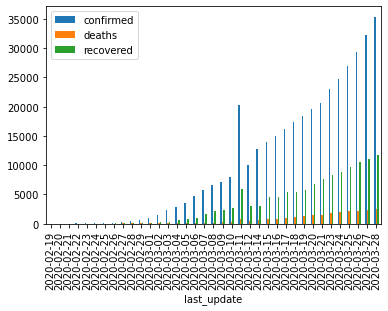

In [29]:
plot_country_data(data_by_days, "Iran")

A Espanha iniciou com uma estratégia de apenas testar os casos mais graves da doença.
E agora, que o número de mortos já passa de 1300, resolveu passar para a abordagem de testar o maior número de pessoas,
intensificar a quarentena (para que as pessoas não saiam de casa) e converter hóteis em hospitais [O Globo](https://oglobo.globo.com/mundo/perto-de-colapso-governo-da-espanha-muda-estrategia-apos-superlotacao-de-utis-24321122).

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-01           7       0          0             NaN          NaN   
2020-02-09          12       0          0             5.0          0.0   
2020-02-15          20       0         20             8.0          0.0   
2020-02-25           6       0          2           -14.0          0.0   
2020-02-26          13       0          2             7.0          0.0   
2020-02-27          15       0          2             2.0          0.0   
2020-02-28          32       0          2            17.0          0.0   
2020-02-29          45       0          2            13.0          0.0   
2020-03-01          84       0          2            39.0          0.0   
2020-03-02         120       0          2            36.0          0.0   
2020-03-03         165       1          2            45.0          1.0   
2020-03-04         222       2        

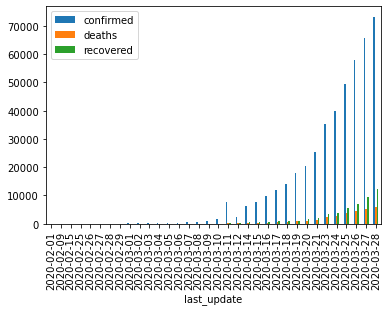

In [30]:
plot_country_data(data_by_days, "Spain")

De acordo com a reportagem do [site rfi](http://www.rfi.fr/br/fran%C3%A7a/20200322-covid-19-profissionais-de-sa%C3%BAde-da-fran%C3%A7a-criticam-escassez-de-testes-e-desrespeito-), vemos que a França inicialmente adotou medidas leves de confinamento e a quantidade de testes tem sido limitada.
Com isso, vemos um avanço forte da doença no país passando do número de 20 mil casos e mil mortos.

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-01          36       0          0             NaN          NaN   
2020-02-08          44       0          0             8.0          0.0   
2020-02-12          33       0          6           -11.0          0.0   
2020-02-15         120      10         40            87.0         10.0   
2020-02-25          14       1         11          -106.0         -9.0   
2020-02-26          18       2         11             4.0          1.0   
2020-02-27          38       2         11            20.0          0.0   
2020-02-28          57       2         11            19.0          0.0   
2020-02-29         100       2         12            43.0          0.0   
2020-03-01         130       2         12            30.0          0.0   
2020-03-02         191       3         12            61.0          1.0   
2020-03-03         204       4        

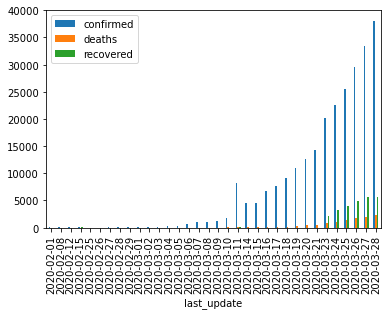

In [31]:
plot_country_data(data_by_days, "France")

A Coreia do Sul tem um número de casos confirmados grande também mas a quantidade de recuperados já está bastante alta.
Enquanto que o número de mortos parece estar controlado. O país tem adotado a estratégia de testar em massa a população contra o vírus e imediatamente isolar aqueles que testarem positivo, conforme [notícia da SuperInteressante](https://super.abril.com.br/saude/a-estrategia-de-sucesso-da-coreia-do-sul-contra-a-covid-19-testes-em-massa/).

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-02          30       0          0             NaN          NaN   
2020-02-04          16       0          0           -14.0          0.0   
2020-02-05          19       0          0             3.0          0.0   
2020-02-06          23       0          0             4.0          0.0   
2020-02-07          48       0          2            25.0          0.0   
2020-02-09          25       0          3           -23.0          0.0   
2020-02-10          27       0          3             2.0          0.0   
2020-02-11          28       0          3             1.0          0.0   
2020-02-12          84       0         21            56.0          0.0   
2020-02-15          28       0          9           -56.0          0.0   
2020-02-16          29       0          9             1.0          0.0   
2020-02-17          30       0        

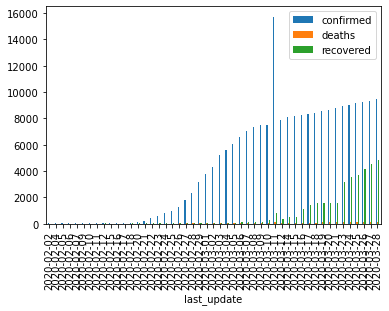

In [32]:
plot_country_data(data_by_days, "South Korea")

A Alemanha adotou a estratégia de testagem massiva desde o início e essa medida tem levado a uma baixa quantidade de mortes diferentes de outros países na europa.
Além disso, a quarentena da população, para que não saiam de casa tem sido imposta por governos municipais e estaduais de acordo [G1](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/20/alemanha-tem-poucas-mortes-por-covid-19-gracas-a-exames-precoces.ghtml).

             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-02          10       0          0             NaN          NaN   
2020-02-03          48       0          0            38.0          0.0   
2020-02-07          26       0          0           -22.0          0.0   
2020-02-09          28       0          0             2.0          0.0   
2020-02-11          32       0          0             4.0          0.0   
2020-02-13          80       0          5            48.0          0.0   
2020-02-18          48       0         36           -32.0          0.0   
2020-02-21          64       0         56            16.0          0.0   
2020-02-25          17       0         14           -47.0          0.0   
2020-02-26          27       0         15            10.0          0.0   
2020-02-27          46       0         16            19.0          0.0   
2020-02-28          48       0        

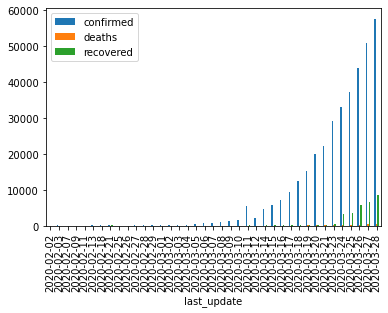

In [33]:
plot_country_data(data_by_days, "Germany")

Não muito tempo depois da Itália ter ultrapassado a quantidade de casos confirmados.
Os Estados Unidos assumiu o topo da lista e com crescimento de cerca de 20 mil casos por dia.
Na [wikipedia](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_States) há informações que relatam a estratégia e a evolução da doença em território norte americano.
A Quarentena tem sido adotado por alguns estados que estão sendo mais acometidos pela doença a fim de conter seu espalhamento.
Inicialmente a quantidade de testes foi limitada a casos graves, entretanto, recentemente foi anunciado que realizariam em toda a população com postos em grandes supermercados.
O governo tem incentivado pesquisas por uma vacina ou medicação para o corona vírus mas até o momento não há um tratamento considerado eficiente contra a doença.


             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-01         133       0          0             NaN          NaN   
2020-02-03         108       0          0           -25.0          0.0   
2020-02-05          27       0          0           -81.0          0.0   
2020-02-09          62       0         62            35.0          0.0   
2020-02-11           2       0          0           -60.0          0.0   
2020-02-13          42       0          0            40.0          0.0   
2020-02-21          84       0         21            42.0          0.0   
2020-02-22          36       0          0           -48.0          0.0   
2020-02-24          36       0          0             0.0          0.0   
2020-02-25          47       0         11            11.0          0.0   
2020-02-26          84       0          0            37.0          0.0   
2020-02-27          24       0        

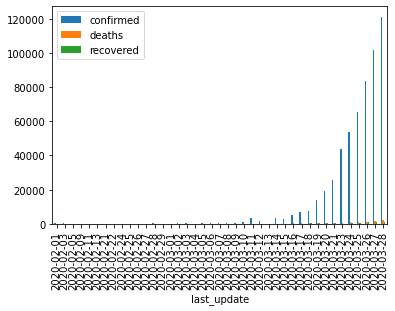

In [34]:
plot_country_data(data_by_days, "US")

Relatos no [wikipedia](https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19_no_Brasil), mostram que no Brasil, os casos se concentram na região sudeste principalmente em São Paulo.
Com o espalhamento da doença, estado tem adotado a quarentena a fim de conter a taxa de infecção.
Isso tem causado controvérsias quanto ao posicionamento do governo federal que já pediu que os estados e cidades em quarentena a interrompecem.
Os testes tem sido feitos de forma selecionado, apenas os pacientes em estado mais grave são testados.
Ainda assim o número de casos tem sido expressivo e feito com que o país esteja entre os vinte primeiros.


             confirmed  deaths  recovered  diff_confirmed  diff_deaths  \
last_update                                                              
2020-02-26           3       0          0             NaN          NaN   
2020-02-29           8       0          0             5.0          0.0   
2020-03-04           8       0          0             0.0          0.0   
2020-03-06          26       0          0            18.0          0.0   
2020-03-08          20       0          0            -6.0          0.0   
2020-03-09          25       0          0             5.0          0.0   
2020-03-10          31       0          0             6.0          0.0   
2020-03-11         189       0          0           158.0          0.0   
2020-03-12          52       0          0          -137.0          0.0   
2020-03-13         151       0          0            99.0          0.0   
2020-03-15         162       0          0            11.0          0.0   
2020-03-16         200       0        

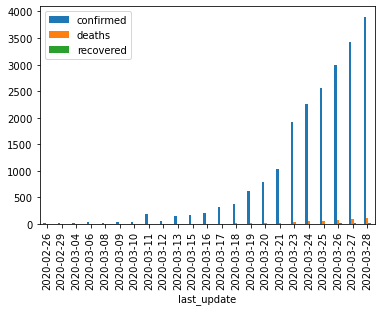

In [35]:
plot_country_data(data_by_days, "Brazil")

## Criação de Modelos de Machine Learning

Uma forma de 'prever' o desenvolvimento da doença nos países seriam encontrando padrões que demonstrem quais a similaridades entre eles.
Com base nos dados que temos a respeito do covid ao redor do mundo, podemos usar as taxas de mortalidade, de recuperação e de infecção para determinar as características de um país frente a doença.
As taxas consideram a proporção mas não o volume, o que permite associar países com número menores com maiores em que a proporção de casos se similares.

As técnicas de agrupamentos são uma excelente ferramenta para esta tarefa. 
Neste trabalho usamos  ** Agglomerative Clustering ** que nos retornar uma árvore com o agrupamento dos países dada a distância calculada com base em suas características.



In [36]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Para exibir os resultados, obtidos com a técnica aplicada, exibiremos em dendograma.
Este gráfico permite-nos identificar quais países estão associados a quais.

In [37]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

A varíavel X será nosso grupo de entrada para o algoritmo, logo a popularemos com os valores das características de cada país.

In [38]:

worldwide_cases_pd = worldwide_cases.select(['Country/Region', 'fatalities_rate', 'recovery_rate', 'population_infection_rate']).toPandas().dropna()
print(worldwide_cases_pd)
X = worldwide_cases_pd[['fatalities_rate', 'recovery_rate', 'population_infection_rate']]
print(X)

                       Country/Region  fatalities_rate  recovery_rate  \
0                                  US         0.016678       0.008825   
1                               Italy         0.108390       0.133922   
2                               China         0.040479       0.921094   
3                               Spain         0.081682       0.167748   
4                             Germany         0.007505       0.146997   
..                                ...              ...            ...   
174                            Belize         0.000000       0.000000   
175                     Guinea-Bissau         0.000000       0.000000   
176                       Timor-Leste         0.000000       0.000000   
177  Saint Vincent and the Grenadines         0.000000       1.000000   
178                  Papua New Guinea         0.000000       0.000000   

     population_infection_rate  
0                     0.037130  
1                     0.153020  
2                     0.

Assim podemos aplicar a técnica ao conjunto de dados a fim de obtermos o modelo que descreve os resultados do agrupamento. 

In [39]:

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

Por fim, passamos o modelo para ser exibido no dendograma. 
Com base no dendograma, notamos similaridades entre China e Coréia do Sul que possuem taxas maiores de recuperados.
E, também, vemos Itália e Espanha agrupados que possuem uma taxa de mortalidade maior.
Além disso, vemos esse dois grupos afastados nos extremos do dendograma.

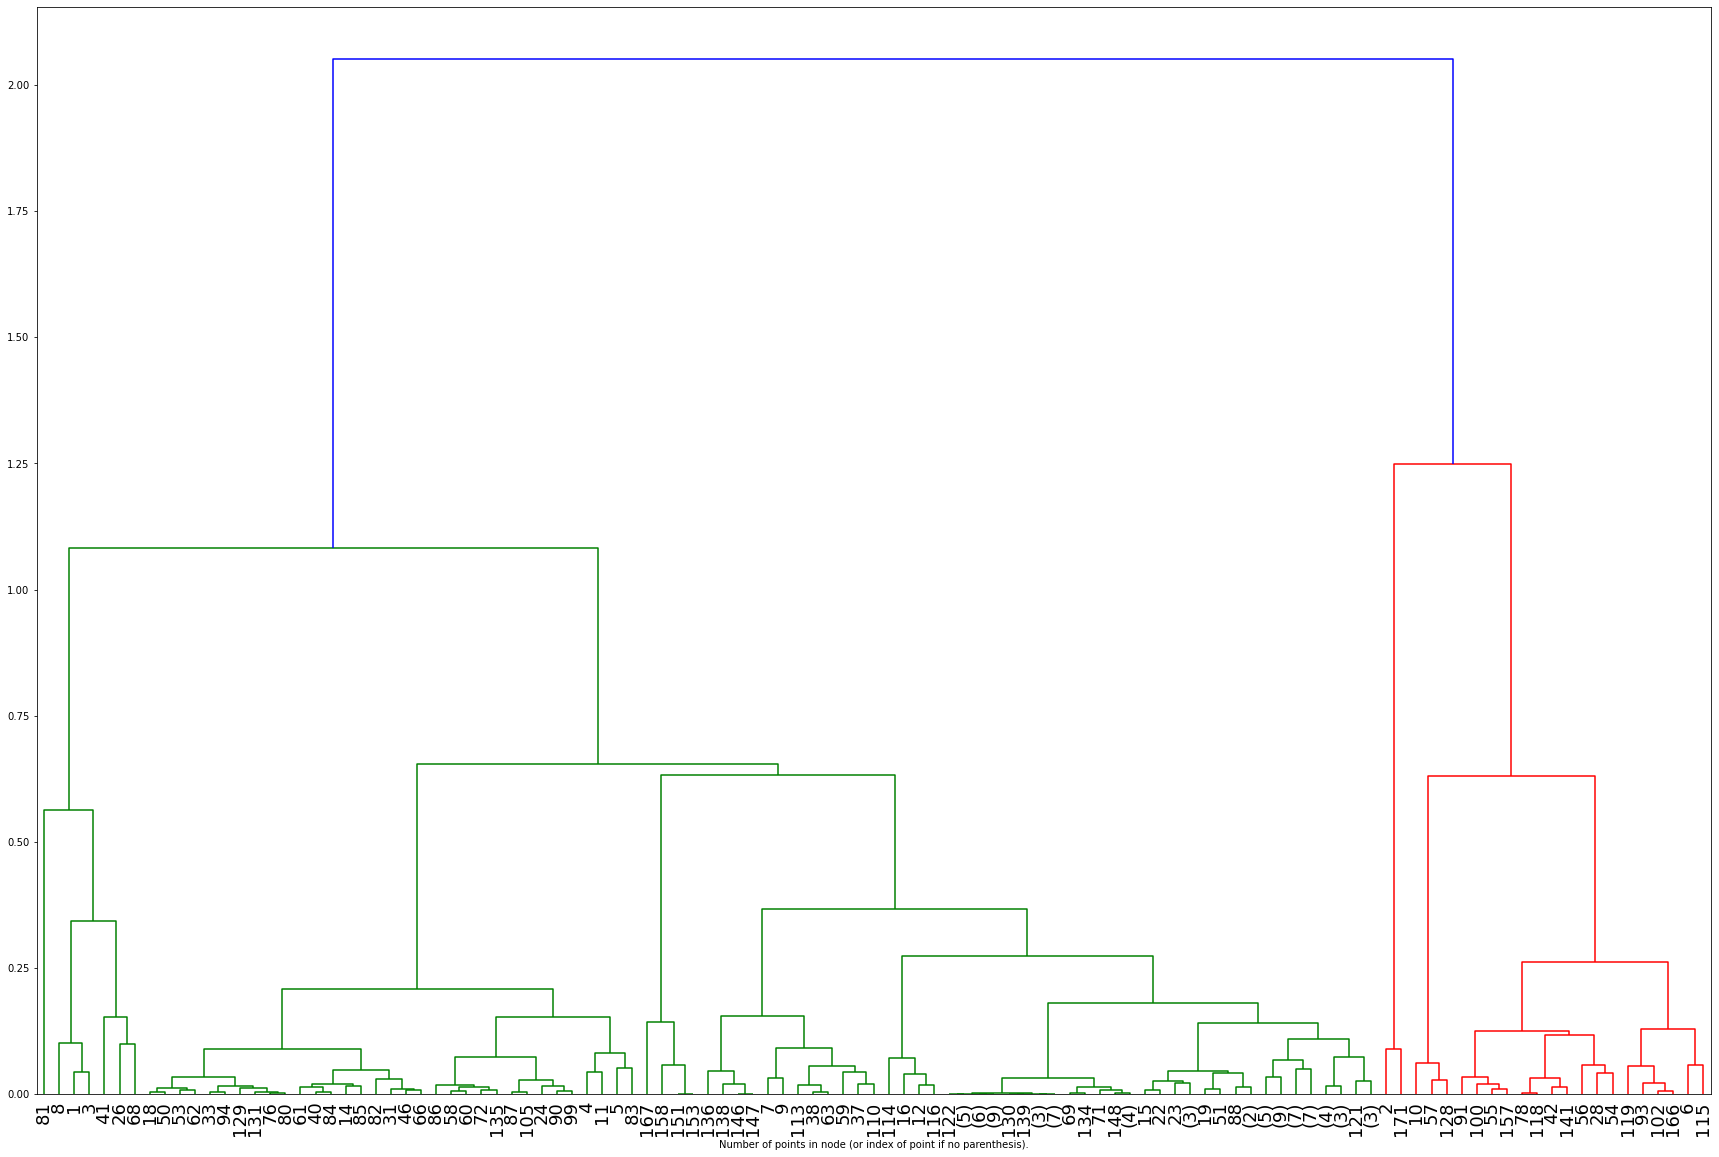

                       Country/Region  fatalities_rate  recovery_rate  \
177  Saint Vincent and the Grenadines         0.000000       1.000000   
2                               China         0.040479       0.921094   
129                          Maldives         0.000000       0.562500   
58                            Bahrain         0.008403       0.556723   
10                        South Korea         0.015193       0.507597   
103                           Belarus         0.000000       0.340426   
170                       Saint Lucia         0.000000       0.333333   
6                                Iran         0.071086       0.329841   
94                          Venezuela         0.016807       0.327731   
116                        Bangladesh         0.104167       0.312500   

     population_infection_rate  
177                   0.000910  
2                     0.005845  
129                   0.003103  
58                    0.030329  
10                    0.018356 

In [40]:
plt.figure(figsize=(30,20))
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xticks(fontsize= 18)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
print(worldwide_cases_pd.sort_values('recovery_rate', ascending=False).head(10))
print(worldwide_cases_pd.sort_values('fatalities_rate', ascending=False).head(10))
print(worldwide_cases_pd.sort_values('population_infection_rate', ascending=False).head(10))

## Apresentação dos Resultados

O novo corona vírus (covid-19) tem se espalhado rapidamente pelo mundo desde que foi confirmado o primeiro caso na China.
Esse novo vírus é uma ameça invísivel que já tem contabilizado dezena de milhares de mortes em pouco tempo.
Sua forma de transmissão é baseada no contato social (beijos ou abraços) ou com o contato com superfícies contaminadas onde o vírus se mantém ativo por dias.
Isso tem levado os países tomarem diversas medidas com intuito de conterem o avanço da doença em seus territórios.

Dentre essas medidas estão: o isolamento social, por meio de quarentena voluntária (orientando para as pessoas não sairem de casa) ou forçada (interrompendo atividades comerciais, educacionais, eventos entre outros);
testagem em massa contra o vírus a fim de identificar as pessoas contaminadas (mesmo que não apresentem sintomas) e isolá-las;
além da orientação e educação a respeito da doença.
A testagem em alguns países tem sido aplicada apenas em casos graves, o que não permite identificar aqueles que estão contaminados mas sem apresentar nenhum tipo de sintoma.
E, assim, esses continuam circulando e contribuindo na disseminação da doença [CanalTech](https://canaltech.com.br/saude/testes-de-covid-19-na-islandia-mostram-que-metade-dos-infectados-e-assintomatica-162484/).

Essas medidas naturalmente afetam o cotidiano e a economia dos países.
Devido a isso vários países tem retardado a adoção dessas medidas.
Os EUA tem apresentado um volume de desempregado histórico, artigo da [Istoé](https://www.istoedinheiro.com.br/eua-tem-recorde-em-pedidos-de-seguro-desemprego-em-meio-a-crise-da-covid-19/), independente das diversas medidas do governo para incentivar a economia diante da crise por conta da doença.
Além de que devido a aversão a risco, o mercado de ações mundiais teren quedas históricas voltando a números de alguns anos atrás conforme artigo da [BBC](https://www.bbc.com/portuguese/brasil-51859307).

Entretanto, com a capacidade de transmissão do vírus o aumento de casos é exponencial e em um curto prazo de tempo.
O que leva ao comprometimento da rede de saúde com a incapacidade de atender tantas pessoas ao mesmo tempo.
Vemos o reflexo disso principalmente em países como a Itália e a Espanha.
Onde os médicos na Itália já tem que decidir quais pacientes valem a pena investir esforços para salvar ou não.

Enquanto isso, países como a Coréia do Sul, Alemanha e China tem aplicado as medidas de forma intensa e antecipada.
E com isso, tem contido o avanço da doença (a China chegou a ficar alguns dias sem contabilizar novos casos) e ter um volume maior de recuperados do que mortos.

Além disso, vemos em nosso resultado do agrupamento que aplicamos no conjunto de dados que estes países representam grupos em pontos extremos do dendograma, significando que possuem maior distância devido ao comportamento das taxas de mortes e recuperados.

Com base nas análises dos dados e resultados obtidos nesse projeto concluímos que o isolamento social é importante a fim de conter a doença.
A quarentena tem sido a forma mais eficaz, no momento, de combate a doença uma vez que não existe tratamento por meio de medicamentos ou vacinas.
Entretanto, com um volume de testes mais eficiente e isolamentos de casos confirmados tem menor impacto na sociedade e torna o isolamento mais eficiente.



## Links

Aqui você deve disponibilizar os links para o vídeo com sua apresentação de 5 minutos  e  para  o  repositório  contendo  os  dados  utilizados  no  projeto,  scripts criados, etc.

In [41]:
#spark.close()


AttributeError: 'SparkSession' object has no attribute 'close'